In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer

import lightgbm as lgb
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install lightgbm


In [ ]:
!pip install xgboost

In [ ]:
pip install lightgbm xgboost


In [3]:
# Load Titanic training dataset
df = pd.read_csv("Titanic_train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

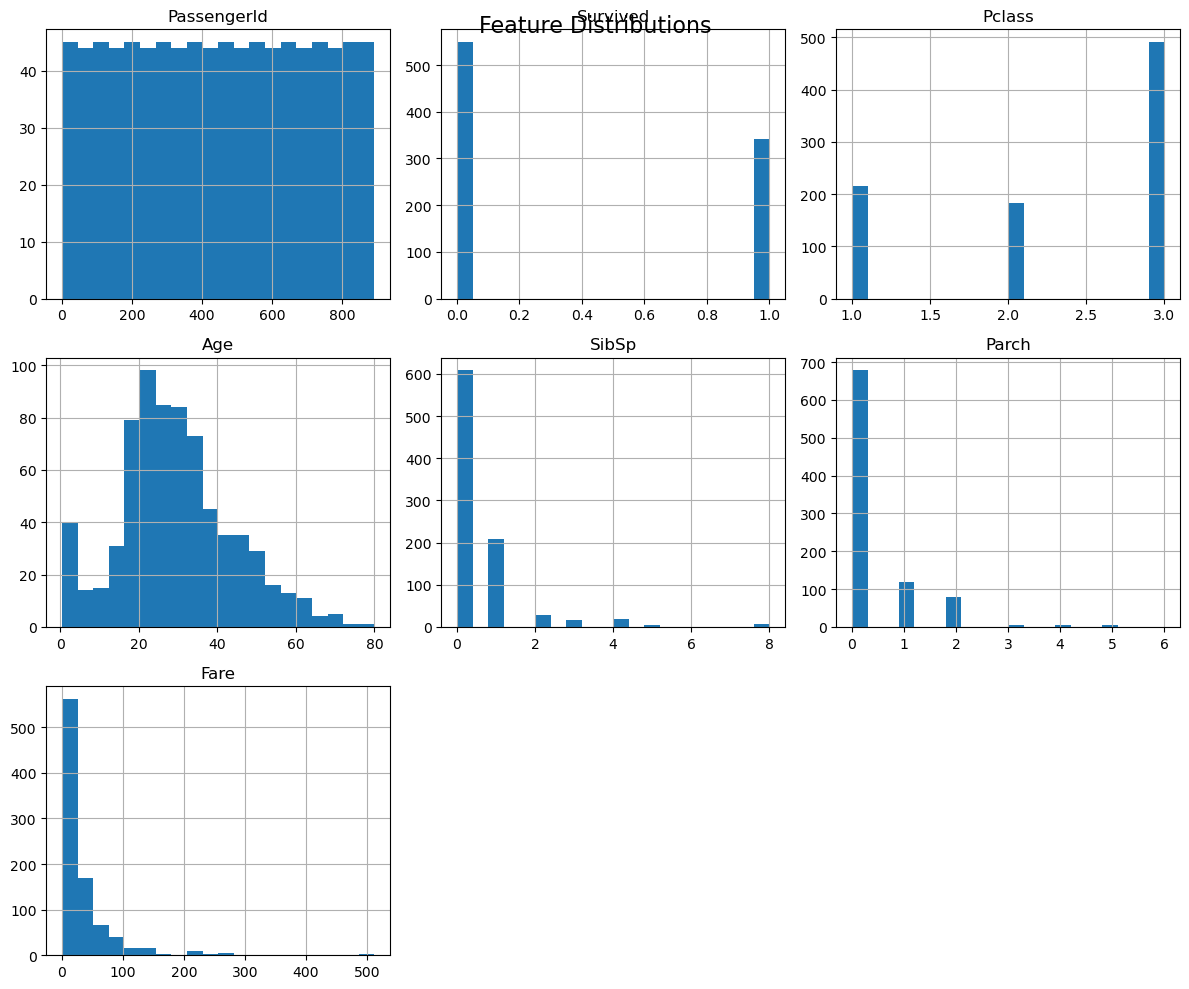

In [7]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


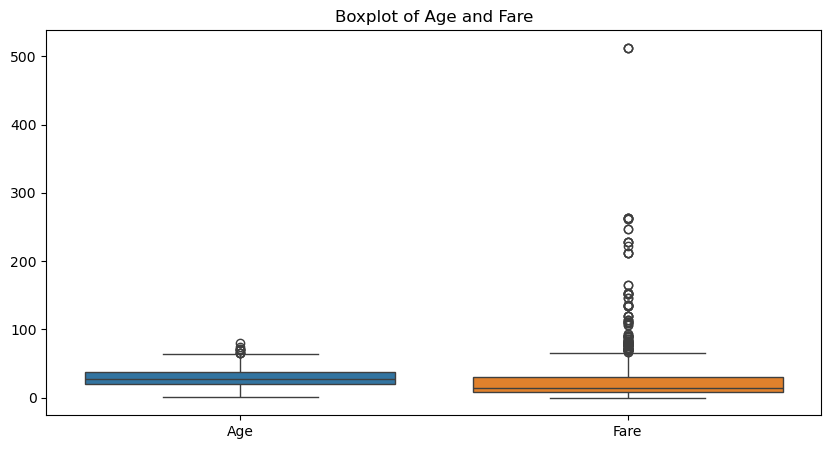

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare")
plt.show()


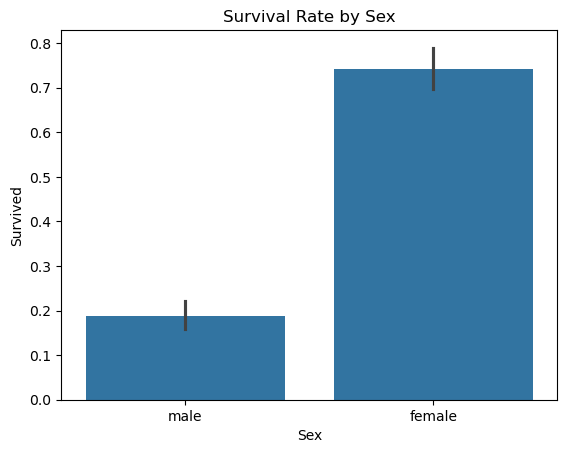

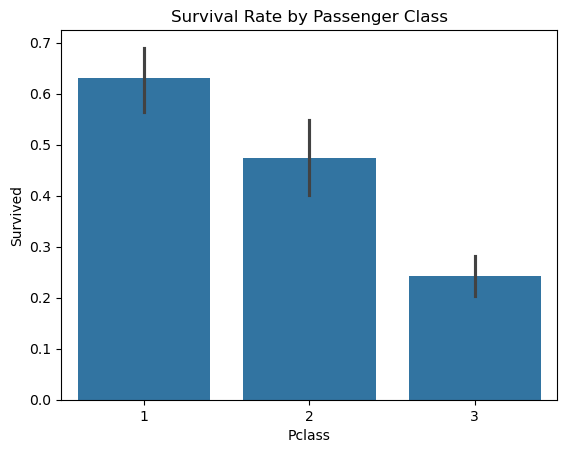

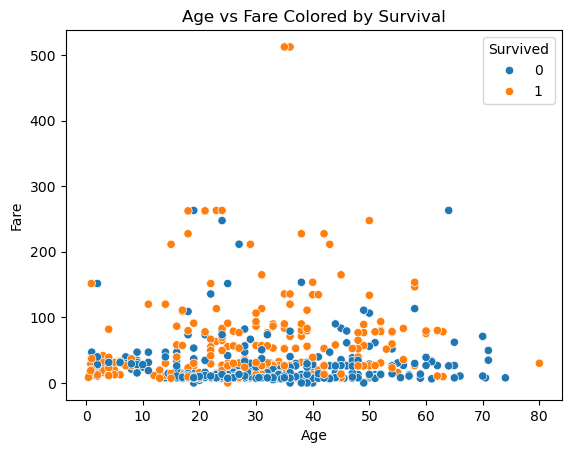

In [11]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare Colored by Survival")
plt.show()


In [13]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with most frequent
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing)
df.drop('Cabin', axis=1, inplace=True)


In [15]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])      # male:1, female:0
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])


In [17]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} Evaluation ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))


In [23]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

lgb_pred = lgb_model.predict(X_test)

evaluate_model(y_test, lgb_pred, "LightGBM")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [25]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

evaluate_model(y_test, xgb_pred, "XGBoost")



--- XGBoost Evaluation ---
Accuracy : 0.7988826815642458
Precision: 0.7567567567567568
Recall   : 0.7567567567567568
F1 Score : 0.7567567567567568
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [27]:
print("Cross-Validation Accuracy (LightGBM):", cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy').mean())
print("Cross-Validation Accuracy (XGBoost):", cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy').mean())


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

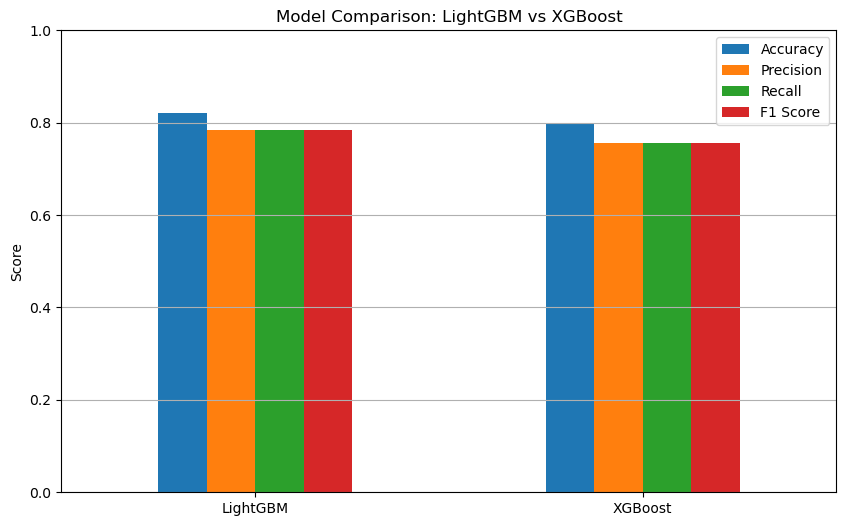

In [29]:
metrics = {
    'Accuracy': [accuracy_score(y_test, lgb_pred), accuracy_score(y_test, xgb_pred)],
    'Precision': [precision_score(y_test, lgb_pred), precision_score(y_test, xgb_pred)],
    'Recall': [recall_score(y_test, lgb_pred), recall_score(y_test, xgb_pred)],
    'F1 Score': [f1_score(y_test, lgb_pred), f1_score(y_test, xgb_pred)],
}

results_df = pd.DataFrame(metrics, index=['LightGBM', 'XGBoost'])

results_df.plot(kind='bar', figsize=(10, 6), title="Model Comparison: LightGBM vs XGBoost")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [ ]:
# # Summary Report

# - **LightGBM** and **XGBoost** both performed well on the Titanic dataset.
# - LightGBM was slightly faster and achieved similar accuracy.
# - XGBoost had marginally better recall, suggesting it caught more survivors.
# - Cross-validation results confirm both models are stable and effective.

# # Practical Implications

# - Use **LightGBM** for faster training and deployment.
# - Use **XGBoost** when model interpretability and fine-tuning are more critical.

# # Recommendation

# - Both models are suitable; choose based on project constraints like speed vs performance.
